In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head(15)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
5,2601,4,18.355521,46.301291,Premium,0
6,2710,4,23.825352,2.142234,Comfort,1
7,2911,7,19.491440,42.587786,Premium,1
8,2948,6,18.996947,67.540478,Premium,1
9,3013,2,15.692942,33.417278,Delivery,1


Выделяем подгруппы значений для классов Economy и Comfort:

In [ ]:
eco = df[df['offer_class_group'] == 'Economy']
com = df[df['offer_class_group'] == 'Comfort']

print('Выборки имеют одинаковую длину', len(eco) == len(com))

Выборки имеют одинаковую длину True


Вычисляем описательную статистику для поля "distance_km" для выборок Comfort и Economy: 

In [ ]:
import statistics as st

Для Economy:

In [ ]:
#средняя дальность поездки
st.mean(eco['distance_km'])

26.283116862179483

In [ ]:
#стандартное отклонение
st.stdev(eco['distance_km'])

17.01615268667912

In [ ]:
#минимальная дистанция поездки или нулевой персентиль
eco['distance_km'].min()

0.08994740093195475

In [ ]:
#25-й персентиль
eco['distance_km'].quantile(0.25)

13.3722285788144

In [ ]:
#50-й персентиль или медиана
eco['distance_km'].quantile(0.50)

23.798182944304884

In [ ]:
#75-й персентиль
eco['distance_km'].quantile(0.75)

36.845286721891

In [ ]:
#максимальная дистанция или сотый персентиль
eco['distance_km'].max()

90.5166181048858

Для Comfort:

In [ ]:
#средняя дальность поездки
st.mean(com['distance_km'])

29.758909792274043

In [ ]:
#стандартное отклонение
st.stdev(com['distance_km'])

17.644643077451175

In [ ]:
#минимальная дистанция поездки или нулевой персентиль
com['distance_km'].min()

0.02425920721393027

In [ ]:
#25-й персентиль
com['distance_km'].quantile(0.25)

16.345205457764347

In [ ]:
#50-й персентиль или медиана
com['distance_km'].quantile(0.50)

28.07827304470703

In [ ]:
#75-й персентиль
com['distance_km'].quantile(0.75)

41.300649551156205

In [ ]:
#максимальная дистанция или сотый персентиль
com['distance_km'].max()

81.50702248866502

**Проверяем гипотезу: “На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки – Comfort-класс”**

**H0: Дистанции поездок не отличаются в зависимости от выбора класса поездки**

**H1: Дистанции поездок отличаются в зависимости от выбора класса поездки**

Строим графики распределения по группам:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


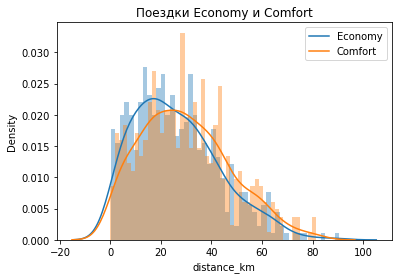

In [ ]:
sns.distplot(eco['distance_km'], 50)
sns.distplot(com['distance_km'], 50)
plt.title('Поездки Economy и Comfort')
plt.legend(['Economy', 'Comfort'])
plt.show()

Из графиков видно, что при увеличении дальности поездки, класс Comfort пользуется большей популярностью, чем класс Economy. Проверим данное утверждения, проведя статистические тесты. 

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

Т-тест (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(com['distance_km'], eco['distance_km'])
print('p-value: %8f' % result.pvalue)

if (result.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else: 
   print('Подтверждаем нулевую гипотезу')

p-value: 0.001568
Отвергаем нулевую гипотезу


In [ ]:
#Принимаем H1: Дистанции поездок отличаются в зависимости от выбора класса поездки

Тест Манна-Уитни (U-критерий Манна-Уитни)

In [ ]:
result = mannwhitneyu(com['distance_km'], eco['distance_km'])
print('p-value: %8f' % result.pvalue)

if (result.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else: 
   print('Подтверждаем нулевую гипотезу')

p-value: 0.001285
Отвергаем нулевую гипотезу


In [ ]:
#Принимаем H1: Дистанции поездок отличаются в зависимости от выбора класса поездки

На основании проведенных тестов, а так же на основании описательной статистики и графика распределений, мы можем сделать вывод: 
> **На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки – Comfort-класс**

